In [20]:
import numpy as np
import pandas as pd

# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

# Matplotlib forms basis for visualization in Python
import matplotlib.pyplot as plt

# We will use the Seaborn library
import seaborn as sns
sns.set()

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [7]:
df = pd.read_csv('../data/telecom_churn.csv')

In [8]:
df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Here is the description of our features:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **State** | State abbreviation (like KS = Kansas) | String | Categorical |
| **Account length** | How long the client has been with the company | Numerical | Quantitative |
| **Area code** | Phone number prefix | Numerical | Categorical |
| **International plan** | International plan (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Voice mail plan** | Voicemail (on/off) | String, "Yes"/"No" | Categorical/Binary |
| **Number vmail messages** | Number of voicemail messages | Numerical | Quantitative |
| **Total day minutes** |  Total duration of daytime calls | Numerical | Quantitative |
| **Total day calls** | Total number of daytime calls  | Numerical | Quantitative |
| **Total day charge** | Total charge for daytime services | Numerical | Quantitative |
| **Total eve minutes** | Total duration of evening calls | Numerical | Quantitative |
| **Total eve calls** | Total number of evening calls | Numerical | Quantitative |
| **Total eve charge** | Total charge for evening services | Numerical | Quantitative |
| **Total night minutes** | Total duration of nighttime calls | Numerical | Quantitative |
| **Total night calls** | Total number of nighttime calls | Numerical | Quantitative |
| **Total night charge** | Total charge for nighttime services | Numerical | Quantitative |
| **Total intl minutes** | Total duration of international calls  | Numerical | Quantitative |
| **Total intl calls** | Total number of international calls | Numerical | Quantitative |
| **Total intl charge** | Total charge for international calls | Numerical | Quantitative |
| **Customer service calls** | Number of calls to customer service | Numerical | Categorical/Ordinal |

The last data column, **Churn**, is our target variable. It is binary: *True* indicates that that the company eventually lost this customer, and *False* indicates that the customer was retained. Later, we will build models that predict this feature based on the remaining features. This is why we call it a *target*.

### 2. Univariate visualization

*Univariate* analysis looks at one feature at a time. When we analyze a feature independently, we are usually mostly interested in the *distribution of its values* and ignore other features in the dataset.

Below, we will consider different statistical types of features and the corresponding tools for their individual visual analysis.

#### 2.1 Quantitative features

*Quantitative features* take on ordered numerical values. Those values can be *discrete*, like integers, or *continuous*, like real numbers, and usually express a count or a measurement.

##### Histograms and density plots

The easiest way to take a look at the distribution of a numerical variable is to plot its *histogram* using the `DataFrame`'s method [`hist()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html).

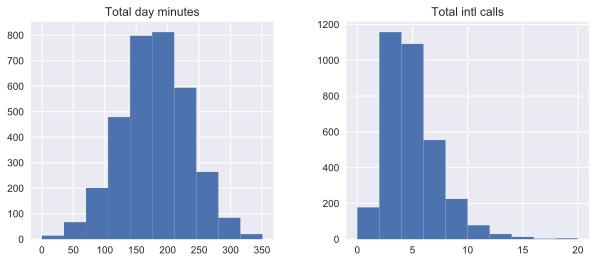

In [9]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(10, 4));

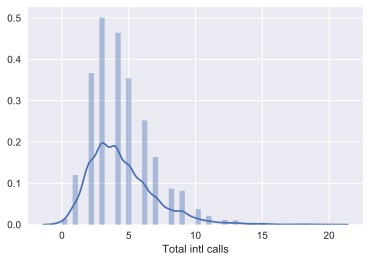

In [10]:
sns.distplot(df['Total intl calls']);

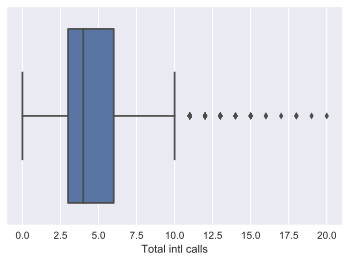

In [11]:
sns.boxplot(x='Total intl calls', data=df);

Let's see how to interpret a box plot. Its components are a *box* (obviously, this is why it is called a *box plot*), the so-called *whiskers*, and a number of individual points (*outliers*).

The box by itself illustrates the interquartile spread of the distribution; its length is determined by the $25th \, (\text{Q1})$ and $75th \, (\text{Q3})$ percentiles. The vertical line inside the box marks the median ($50\%$) of the distribution. 

The whiskers are the lines extending from the box. They represent the entire scatter of data points, specifically the points that fall within the interval $(\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR})$, where $\text{IQR} = \text{Q3} - \text{Q1}$ is the [interquartile range](https://en.wikipedia.org/wiki/Interquartile_range).

Outliers that fall out of the range bounded by the whiskers are plotted individually as black points along the central axis.

We can see that a large number of international calls is quite rare in our data.

##### Violin plot

The last type of distribution plots that we will consider is a *violin plot*.

Look at the figures below. On the left, we see the already familiar box plot. To the right, there is a *violin plot* with the kernel density estimate on both sides.

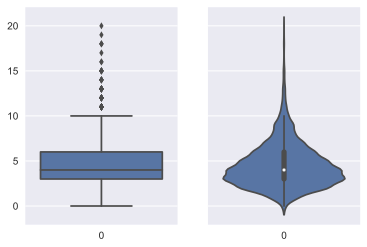

In [13]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0]);
sns.violinplot(data=df['Total intl calls'], ax=axes[1]);

# Multivariate Visualization
*Multivariate* plots allow us to see relationships between two and more different variables, all in one figure. Just as in the case of univariate plots, the specific type of visualization will depend on the types of the variables being analyzed.

#### 3.1 Quantitative–Quantitative

##### Correlation matrix

Let's look at the correlations among the numerical variables in our dataset. This information is important to know as there are Machine Learning algorithms (for example, linear and logistic regression) that do not handle highly correlated input variables well.

First, we will use the method [`corr()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) on a `DataFrame` that calculates the correlation between each pair of features. Then, we pass the resulting *correlation matrix* to [`heatmap()`](https://seaborn.pydata.org/generated/seaborn.heatmap.html) from `seaborn`, which renders a color-coded matrix for the provided values:

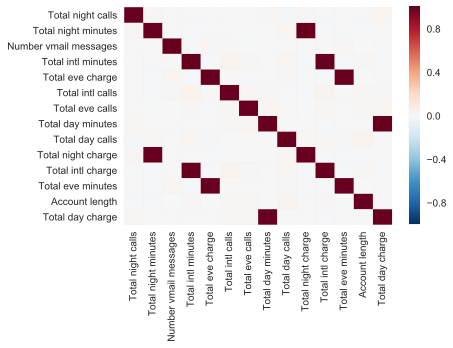

In [21]:
# Drop non-numerical variables
numerical = list(set(df.columns) - 
                 set(['State', 'International plan', 'Voice mail plan', 
                      'Area code', 'Churn', 'Customer service calls']))

# Calculate and plot
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix);

### Scatter plot

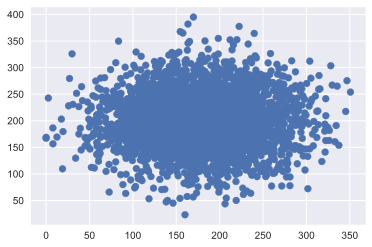

In [17]:
plt.scatter(df['Total day minutes'], df['Total night minutes']);

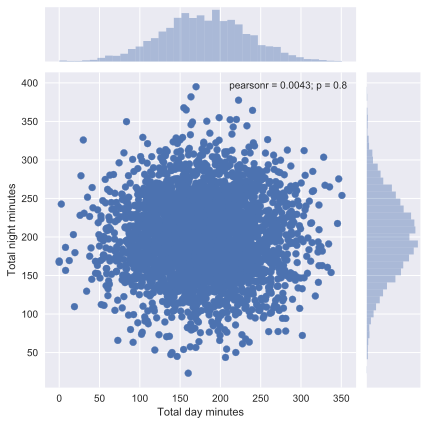

In [18]:
sns.jointplot(x='Total day minutes', y='Total night minutes', 
              data=df, kind='scatter');

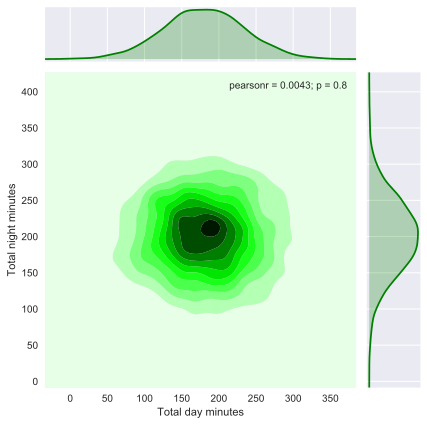

In [19]:
sns.jointplot('Total day minutes', 'Total night minutes', data=df,
              kind="kde", color="g");